<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo III: Aprendizaje supervizado: Regresión Logística 

> La **regresión logística** es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama **regresión logística simple** cuando solo hay una variable independiente y **regresión logística múltiple** cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como **regresores, predictores o features**.

Si una variable cualitativa con dos niveles (binaría) se codifica como 0 y 1, matemáticamente es posible ajustar un modelo de regresión lineal por mínimos cuadrados. Sin embargo, esta aproximación tiene dos problemas:

- Al generar una recta (hiperplano si hay múltiples variables), se pueden obtener valores predichos distintos de 0 y 1, lo que entra en contradicción con la definición de la variable respuesta binaria.

- Si se quiere interpretar las predicciones del modelo como probabilidades de pertenencia a cada clase, no se cumpliría la condición de que toda probabilidad ha de estar dentro del intervalo [0,1], ya que podrían obtenerse valores fuera de este.

Para evitar estos problemas, la **regresión logística** transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1 (función sigmoide). 

> Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide):

$$sigmoide = \sigma(y) = \frac{1}{1+e^{-y}}$$

<img style="float: center;;" src='../Imagenes/sigmoide.png' width="500" height="100"/></a>


> Para valores de $y$  positivos muy grandes,  $e^{−y}$  es aproximadamente 0, por lo que el valor de la función sigmoide es 1. Para valores de  $y$ negativos muy grandes,  $e^{−y}$  tiende a infinito, por lo que el valor de la función sigmoide es 0.

> Sustituyendo la  y  de la ecuación anterior por la función de un modelo lineal $y=\beta_0 + \beta_1 x_1 + ... + \beta_p x_p$ se obtiene que:

$$P(y=1|X=x) = \frac{e^{\beta_0 + \beta_1x_1 +...+\beta_px_p}}{1 + e^{\beta_0 + \beta_1x_1 +...+\beta_px_p}}$$

> donde $P(y=1|X=x)$ puede interpretarse como la probabilidad de que la variable respuesta  y  adquiera el valor 1 (clase de referencia), dado los predictores $x_1,...,x_p$. El modelo resultante tiene los coeficientes de regresión en los exponentes, por lo que no es un modelo lineal.

> La expresión obtenida tiene la característica de ser siempre positiva, ya que la función exponencial solo toma valores positivos y, el cociente de valores positivos, es siempre positivo. Esto hace posible aplicarle el logaritmo:

$$ln(\frac{P(y=1|X=x)}{P(y=0|X=x)}) = \beta_0 + \beta_1x_1 +...+\beta_px_p$$

> Al realizar la transformación, en el lado derecho se obtiene la ecuación de un modelo lineal. El término de la izquierda resulta ser el logaritmo de un cociente de probabilidades, lo que se conoce como razón de probabilidad (log of odds).

> Como resultado de este proceso se consigue convertir un problema de clasificación no lineal, en un problema de regresión lineal que sí puede ajustarse mediante los métodos convencionales.



### Función de Costo

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m[y^{(i)}\log\hat{y}(x^{(i)}) + (1-y^{(i)})\log(1 - \hat{y}(x^{(i)}))]$$

### Ejemplos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import scipy.optimize as opt

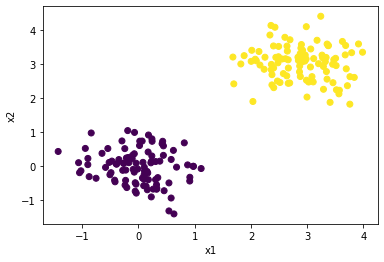

In [2]:
# Programar la regresión logística con nuestras propias funciones
X,Y = make_blobs(n_samples=200, centers=[[0,0],[3,3]], cluster_std=0.5, 
                 n_features= 2)
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
# Función logística g(x)
def fun_log(x):
    return 1/(1+np.exp(-x))

In [4]:
# Función para el modelo y_hat = g(y_hat_lineal) = g(b0+b1*x1+b2*x2+...+bm*xm)
# y_hat = g(B^T*X)

def reg_log(B,X):
    y_hat_lineal = np.matrix(X)*np.matrix(B).transpose()
    y_hat = np.array(fun_log(y_hat_lineal))
    return y_hat[:,0]

In [5]:
# Definición de la función de costo
def fun_cost(B,X,Y):
    m=len(Y)
    y_hat = reg_log(B,X)
    J = np.sum(-Y*np.log(y_hat) - (1-Y)*np.log(1-y_hat))*(1/m)
    return J

In [12]:
np.shape(Xa)

(200, 3)

In [13]:
# Entrenar al modelo
#Inicializar valores

#Xa = [1;X]
Xa = np.append(np.ones((len(Y),1)), X, axis=1)
n,m = np.shape(Xa)
B = np.zeros(m)


In [14]:
Xa

array([[ 1.        , -0.48863881, -0.19308437],
       [ 1.        ,  3.11546334,  3.16572692],
       [ 1.        , -0.41684395, -0.46164155],
       [ 1.        ,  0.13531338, -0.59219039],
       [ 1.        ,  3.32168802,  3.07585222],
       [ 1.        ,  0.22725831, -0.90709876],
       [ 1.        ,  0.10319116, -0.31879084],
       [ 1.        ,  2.51648254,  2.4615541 ],
       [ 1.        , -0.54494553,  0.51778434],
       [ 1.        ,  0.87339082,  0.03550423],
       [ 1.        ,  2.2339907 ,  2.8504751 ],
       [ 1.        ,  0.58130464,  0.19599282],
       [ 1.        ,  1.87864499,  3.25200876],
       [ 1.        , -0.03957728, -0.79501831],
       [ 1.        ,  2.36058422,  2.83888867],
       [ 1.        , -0.23874794, -0.55987283],
       [ 1.        ,  2.94540817,  3.20232197],
       [ 1.        ,  0.24198802,  0.73021486],
       [ 1.        ,  3.6760047 ,  3.27348993],
       [ 1.        ,  3.50438003,  3.17305751],
       [ 1.        ,  1.69486327,  2.420

In [15]:
B

array([0., 0., 0.])

In [16]:
# Minimizar la función de costo
res = opt.minimize(fun_cost, B, args=(Xa,Y))

<ipython-input-5-ed7bcced3e3f>:5: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-Y*np.log(y_hat) - (1-Y)*np.log(1-y_hat))*(1/m)
<ipython-input-5-ed7bcced3e3f>:5: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-Y*np.log(y_hat) - (1-Y)*np.log(1-y_hat))*(1/m)
<ipython-input-3-0e5fd88abacc>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-5-ed7bcced3e3f>:5: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-Y*np.log(y_hat) - (1-Y)*np.log(1-y_hat))*(1/m)
<ipython-input-5-ed7bcced3e3f>:5: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-Y*np.log(y_hat) - (1-Y)*np.log(1-y_hat))*(1/m)
<ipython-input-3-0e5fd88abacc>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-3-0e5fd88abacc>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-5-ed7bcced3e3f>:5: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-Y*

In [20]:
B = res.x

In [23]:
# Evaluación del modelo 
Yhat = np.round(reg_log(B,Xa),0)
Yhat

<ipython-input-3-0e5fd88abacc>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.])

In [25]:
Y

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1])

<ipython-input-3-0e5fd88abacc>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


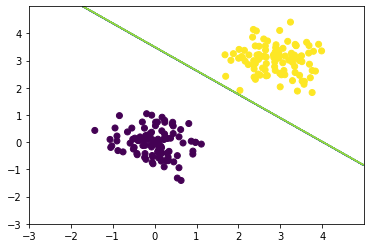

In [27]:
# Generar la visualización de la clasificación

x = np.arange(-3,5,0.01)
y = np.arange(-3,5,0.01)
Xm, Ym = np.meshgrid(x,y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n, 1))
Ymr = np.reshape(Ym,(m*n, 1))

Xtmp = np.append(Xmr,Ymr, axis=1)
Xtmp = np.append(np.ones((len(Xmr),1)), Xtmp, axis=1)
Ytmp = np.round(reg_log(B,Xtmp),0)

Z=np.reshape(Ytmp, (m,n))
plt.contour(Xm,Ym,Z)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

<ipython-input-3-0e5fd88abacc>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


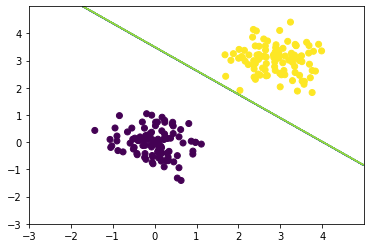

In [28]:

x = np.arange(-3,5,0.01)
y = np.arange(-3,5,0.01)
Xm, Ym = np.meshgrid(x,y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n, 1))
Ymr = np.reshape(Ym,(m*n, 1))

Xtmp = np.append(Xmr,Ymr, axis=1)
Xtmp = np.append(np.ones((len(Xmr),1)), Xtmp, axis=1)
Ytmp = np.round(reg_log(B,Xtmp),0)

Z=np.reshape(Ytmp, (m,n))
plt.contour(Xm,Ym,Z)
plt.scatter(X[:,0], X[:,1], c=Yhat)
plt.show()

In [29]:
Xa

array([[ 1.        , -0.48863881, -0.19308437],
       [ 1.        ,  3.11546334,  3.16572692],
       [ 1.        , -0.41684395, -0.46164155],
       [ 1.        ,  0.13531338, -0.59219039],
       [ 1.        ,  3.32168802,  3.07585222],
       [ 1.        ,  0.22725831, -0.90709876],
       [ 1.        ,  0.10319116, -0.31879084],
       [ 1.        ,  2.51648254,  2.4615541 ],
       [ 1.        , -0.54494553,  0.51778434],
       [ 1.        ,  0.87339082,  0.03550423],
       [ 1.        ,  2.2339907 ,  2.8504751 ],
       [ 1.        ,  0.58130464,  0.19599282],
       [ 1.        ,  1.87864499,  3.25200876],
       [ 1.        , -0.03957728, -0.79501831],
       [ 1.        ,  2.36058422,  2.83888867],
       [ 1.        , -0.23874794, -0.55987283],
       [ 1.        ,  2.94540817,  3.20232197],
       [ 1.        ,  0.24198802,  0.73021486],
       [ 1.        ,  3.6760047 ,  3.27348993],
       [ 1.        ,  3.50438003,  3.17305751],
       [ 1.        ,  1.69486327,  2.420

In [34]:
# Prediciión
Xnew =np.array([[1,4,2],
        [1,2.5,0.5]])
Xnew

array([[1. , 4. , 2. ],
       [1. , 2.5, 0.5]])

In [35]:
Yhat_new = np.round(reg_log(B,Xnew),0)

<ipython-input-3-0e5fd88abacc>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [36]:
Yhat_new

array([1., 0.])